# AI Perceptions Across Professionals - DataDUDES

**Team members:** Prathyush Sajith (psaji) •
Syed Muqtadeer (smuqt2) •
Muhsin Adan (madan6) •
Ammaar Khan (akhan362) •
Zain Farooq (zfaroo9) 

## Project Introduction

### Data - 2022 Pew Research Center’s ATP W119 (ATP_W119.sav)
https://www.pewresearch.org/dataset/american-trends-panel-wave-119/


In an era where **Artificial Intelligence (AI)** is rapidly transforming industries and daily life, understanding public perceptions of its risks, benefits, and societal implications is critical. This project leverages the 2022 Pew Research Center’s ATP (Wave 119) survey dataset to analyze how individuals perceive AI across various domains. The dataset, collected from **slightly over 11,000 U.S. adults**, captures nuanced attitudes through questions spanning AI’s role in **Hiring practices, Medical diagnostics, Workplace surveillance**, and ethical concerns like bias and fairness.

### Data Cleaning
- **Tools & outputs:** Imported the `.sav` with `pyreadstat`, cleaned in `pandas`, script in `preprocess.py`; final file saved as `W119preprocessed.csv`.

- **Column trim:** 150 → 75 key fields (Likert items, demographics, open‑text).

- **Granularity:** One row per respondent covering AI perceptions, workplace factors, healthcare ethics, and demographics.

- **Missing data:** Recoded explicit codes (“Not sure”, “Refused”) to NaN; flagged skipped items via survey skip‑logic.

- **Why no blanket .dropna()?** Keeps sample size intact, leverages pandas’ NaN‑aware stats, and lets us drop only where completeness truly matters.

In [55]:
# Cleaning for Visualization 1 and 3
import pandas as pd
df = pd.read_csv("W119preprocessed.csv")

correct_answers = {
    'AIKNOW1_W119': "Chatbot answers questions",
    'AIKNOW2_W119': "Playlist recommendation",
    'AIKNOW3_W119': "Categorize spam",
    'AIKNOW5_W119': "Wearable fitness trackers",
    'AIKNOW6_W119': "Product recommendations",
    'AIKNOW7_W119': "Security camera alerts"}
df['KnowledgeScore'] = df[list(correct_answers)].apply(lambda row: sum(row[col] == ans for col, ans in correct_answers.items()), axis=1)

# Average knowledge by industry
working = df[df['INDUSTRYCOMBO_W119'].notna() & (df['INDUSTRYCOMBO_W119'] != 99.0)]
name_map = working.groupby('INDUSTRYCOMBO_W119')['KnowledgeScore'].mean()
industry_names = {
    1.0: "Hospitality/Service",
    2.0: "Health Care/Social Asst",
    3.0: "Manufacturing/Constr.",
    4.0: "Retail/Trade",
    5.0: "Education",
    6.0: "Finance/Insurance",
    7.0: "Transportation",
    8.0: "Govt./Public/Military",
    9.0: "IT Firms",
    11.0: "Tech Services",
    13.0: "Other"}
name_map.index = name_map.index.map(industry_names)
name_map = name_map.sort_values()

df.iloc[:5, 19:30]

,F_AGECAT,F_GENDER,F_RACETHNMOD,AIKNOW1_W119,AIKNOW2_W119,AIKNOW3_W119,AIKNOW5_W119,AIKNOW6_W119,AIKNOW7_W119,F_EDUCCAT,F_INC_TIER2
0,65+,Male,1.0,Online survey,Not sure,Not sure,Not sure,Not sure,Light timer,2.0,2.0
1,30-49,Female,1.0,Chatbot answers questions,Playlist recommendation,Categorize spam,Wearable fitness trackers,Product recommendations,Security camera alerts,1.0,3.0
2,50-64,Female,1.0,Chatbot answers questions,Playlist recommendation,Categorize spam,Wearable fitness trackers,Product recommendations,Security camera alerts,1.0,3.0
3,65+,Female,1.0,Chatbot answers questions,Not sure,Not sure,Wearable fitness trackers,Not sure,Not sure,2.0,2.0
4,65+,Male,1.0,Not sure,WiFi streaming,Not sure,Wearable fitness trackers,Product recommendations,Security camera alerts,1.0,3.0


## Exploratory Data Analysis - Visualizations 

## Visualization 1: Buzz or Bother? How Professions Feel on the AI Spectrum

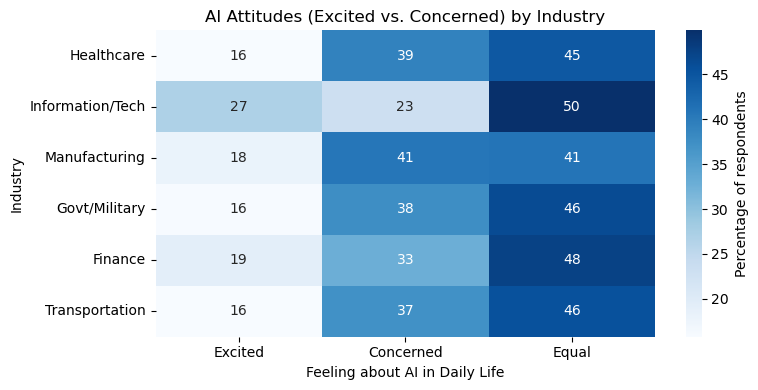

In [4]:
from visualization import viz1, plot_heatmap

attitude_df = viz1(df)
plot_heatmap(attitude_df)

A majority of people in every field feel equally excited and concerned about AI’s growing role ("Equal" column, roughly 45–50% for all industries). However, comparing the “More Excited” vs “More Concerned” responses reveals clear differences: In the Information/Tech sector, 27% report feeling more excited than concerned (higher than the 23% who are more concerned). **IT professionals stand out as the only group more likely to be excited than worried about AI.** Other professions show the opposite pattern – for example, **in Healthcare only ~16% are mostly excited while 39% are mostly concerned**, and in **Manufacturing 18% are excited vs 41% concerned**. Finance and Professional/Tech sectors are more balanced but still lean towards concern. This indicates that tech industry workers have a more optimistic outlook on AI, whereas most other professionals approach AI with greater caution or concern.

## Visualization 2: The Learning Curve - Does AI Savvy Spark Daily Use?

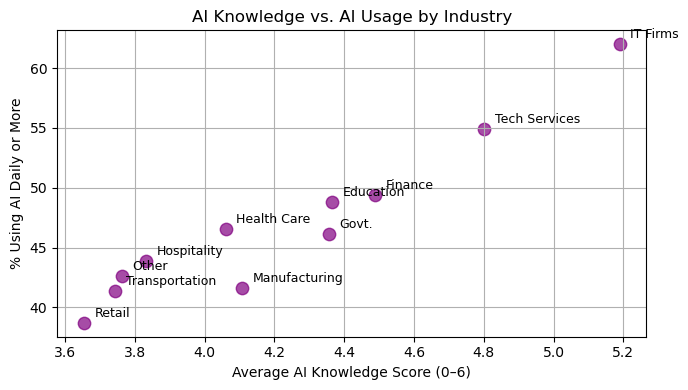

In [6]:
from visualization import viz2, plot_scatter

x, y, labels = viz2(working, industry_names, name_map)
plot_scatter(x, y, labels)

There is a clear positive correlation: **professions with higher AI knowledge tend to report using AI more frequently.** IT professionals (far top-right point) not only scored highest on AI knowledge but also have the largest share of daily AI users **(IT Firms use about 62% use AI daily or more)**. Professional/Technical services and Finance also cluster toward the upper-right, indicating above-average knowledge and usage. In contrast, sectors like **Retail, Hospitality, Transportation, and Manufacturing (lower-left region) combine lower AI knowledge with fewer daily AI users** (around 40% or less). Healthcare and Government fall in the middle – moderate daily usage (~46%) and moderate knowledge. This suggests that more technologically literate fields are integrating AI into daily routines at a higher rate, whereas less tech-focused fields engage with AI less often.

## Visualization 3: Who’s Ready to Let the Bots Hire?

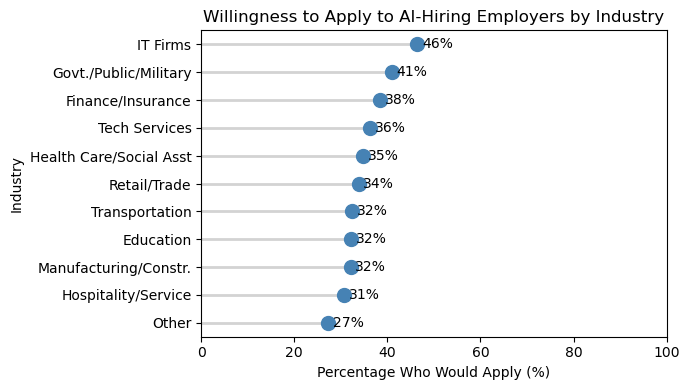

In [6]:
from visualization import viz3

fig, ax = viz3(working, industry_names)

The chart reveals a clear tech‑confidence gradient: **sectors closest to digital innovation—IT firms, government/public‑sector tech initiatives, and finance show the greatest appetite for AI‑driven hiring**, with roughly four in ten workers willing to apply. Interest then tapers through professional/technical services and healthcare, where about one‑third are open to AI screening. **Traditional, hands‑on industries like retail, transportation, education, manufacturing, and hospitality—lag slightly behind, while the catch‑all “Other” category is least receptive**. Overall, familiarity with data‑centric workflows appears to correlate with greater willingness to trust AI in recruitment.


## ML Analysis 1: Classification Analysis - Predicting Perceptions of Medical AI Bias

### Classification Analysis (Predicting Perceived AI Bias)

For classification, we choose `MEDBIAS_W119` as the target variable. This survey question asks whether bias in medical AI is `Not a problem`, `a Minor problem`, or `a Major problem`. It has three fairly balanced categories (around 26%, 35%, 39% of responses respectively), making it suitable for a multi-class classification. We will predict this target using relevant features that likely influence perceptions of AI bias, such as

- **Demographics:**   age group `F_AGECAT`, gender `F_GENDER`, race/ethnicity `F_RACETHNMOD`, education level `F_EDUCCAT`, income tier `F_INC_TIER2`, urban/rural `F_METRO`, political party `F_PARTY_FINAL`, and employment status `EMPLSIT_W119`.
- **AI Familiarity & Usage:** how much the respondent has heard about AI `AI_HEARD_W119` and their frequency of AI use `USEAI_W119`.
- **Attitudes toward AI:** comfort with AI in healthcare `AIHCCOMF_W119`, trust in AI for healthcare `AIHCTRT1_W119`, and general risk perception measures (`RISK2_W119` and the `DESRISK_W119` columns, which rate comfort with AI’s risks/benefits).
- **Related bias concerns:** concern about AI bias in hiring `HIREBIAS1_W119`. (We include this because someone concerned about hiring bias may also see bias in medical AI as a problem.)

### Data Preparation:

- **Encoding:** Categorical text responses (e.g. comfort levels, age categories) are encoded to numeric values. For ordinal responses (like comfort level or familiarity), we map them to ordered integers (e.g. Very uncomfortable=0 … Very comfortable=3). Nominal categories (like gender, race, party) are one-hot encoded into dummy indicator variables.
- **Feature selection:** We exclude scenario-specific questions that half the sample didn’t answer. The features listed above are used, as they are broadly available and relevant.

Test Accuracy: 62.14%

Actual vs Predicted (random 10):
   Actual  Predicted
0       1          1
1       1          1
2       2          2
3       2          0
4       0          0
5       2          1
6       1          1
7       2          2
8       2          2
9       2          2


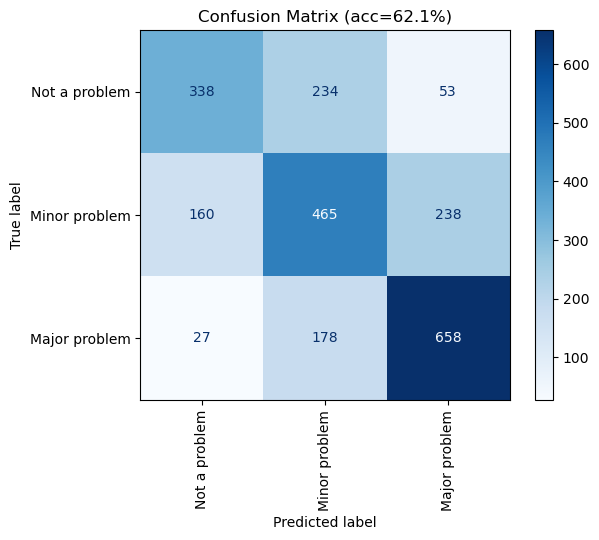

In [4]:
from ml import get_classification_results
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

accuracy, results_df, cm, labels = get_classification_results(df)
print(f"Test Accuracy: {accuracy * 100:.2f}%\n")
print("Actual vs Predicted (random 10):")
print(results_df.sample(n=10, random_state=1).reset_index(drop=True))
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f"Confusion Matrix (acc={accuracy * 100:.1f}%)")
# plt.tight_layout()
plt.show()

This yields an **accuracy around 62%** on the test set. The classification report shows moderate performance for each class (e.g. precision and recall in the 55–72% range for the three categories). This suggests the model captures some signal but also confuses between `Not a problem` and `Minor problem` classes occasionally. 

**Feature importance:** According to the trained random forest, the most influential feature is `HIREBIAS1_W119` – respondents who consider AI bias in hiring a big issue are much more likely to also see bias in medical AI as a `Major problem`. Other important predictors include the desirability-risk tradeoff ratings `DESRISK_COMF`, `CREATE_W119`, `NTECH_W119` and AI usage `USEAI_W119`. For instance, lower comfort with new technology and lower AI usage tend to correlate with seeing bias as a problem. Demographics and general familiarity play a secondary role. 

The **Confusion matrix** shows that our model identifies a clear majority of `Major problem` responses (about 76% recall) and achieves an overall accuracy of 62%. It also captures over half of the `Not a problem` and `Minor problem` cases, with most misclassifications occurring between those two adjacent categories. In other words, while there’s room to improve, the model reliably separates strong bias concerns from other opinions, demonstrating a solid baseline.

## ML Analysis 2: Mapping AI Mindsets: Uncovering Attitudinal Archetypes through Clustering

### Clustering:

We performed an **Unsupervised Clustering** to discover natural groupings of respondents based on their survey responses. Instead of using the survey outcome as in classification, we use several key features to cluster similar individuals together. We have used **K-Means clustering** and visualized the clusters using **Principal Component Analysis (PCA)** in two dimensions.

#### Feature selection for clustering: 

We have included many of the same features as before (excluding the target). In particular, we use: comfort with AI `AIHCCOMF_W119`, AI familiarity `AI_HEARD_W119`, AI usage frequency `USEAI_W119`, the risk/benefit attitude measures `DESRISK_W119`, `RISK2_W119`, trust in AI `AIHCTRT1_W119`, bias concern in hiring `HIREBIAS1_W119`, and demographics (age, gender, race, etc.). By using these features, we capture both personal traits and attitudes toward AI.

#### Data preprocessing for clustering: 

We have handled missing values and encode categories similarly as in classification. For clustering, we used `StandardScaler` to give each feature zero-mean and unit-variance.

Cluster sizes: [2483 3563 3408]


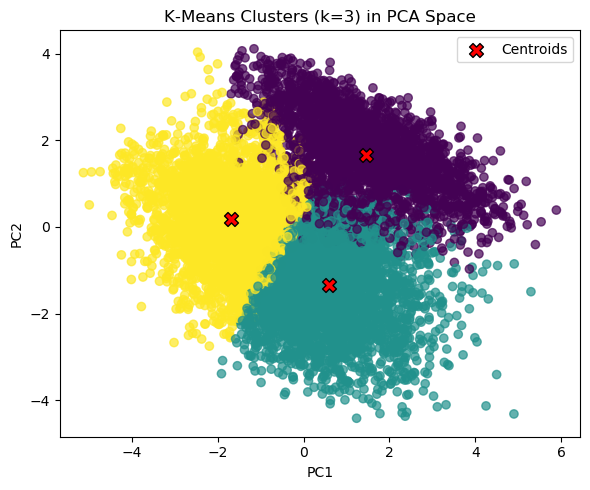

In [4]:
import pandas as pd
from ml import preprocess, cluster_and_embed, plot_clusters
X_scaled = preprocess(df)
labels, sizes, X2, centers2 = cluster_and_embed(X_scaled, k=3)
print("Cluster sizes:", sizes)
plot_clusters(X2, labels, centers2, k=3)

The PCA‐scatter above shows **three fairly distinct clusters** of respondents when clustered on their AI attitudes, usage, comfort, and risk/bias measures:

**PC1 (x-axis) - Enthusiasm/Comfort on AI**

**PC2 (y-axis) - Risk/Bias Concerns on AI**

**Cluster A (Yellow, n = 2483)** - These respondents score **low on the AI‐enthusiasm** axis (PC1), that is, they report relatively low familiarity, usage and comfort with AI—and are roughly neutral on risk/bias concerns (PC2≈0). In other words, they are the *Novices/Neutral* group: not heavy users of AI but not extremely worried either.

**Cluster B (Purple, n = 3563)** - This group has **moderate‐to‐high AI usage** and comfort (high PC1) but also high perceived risk and bias concerns (high PC2). We can think of them as *Cautious Adopters*. They know and use AI, yet remain worried about its risks (especially bias).

**Cluster C (Teal, n = 3408)** - These respondents score **high on AI familiarity**, usage, and comfort (high PC1) while registering low risk/bias concerns (low PC2). They are the classic *AI Enthusiasts* — very comfortable and trusting of AI, with minimal worry about bias or potential harms.

## Takeaway:
**The people who live and breathe tech are the ones who trust and use AI the most.** IT and other technical pros know more about AI, tap into it daily, and lean excited rather than worried. Everyone else, from healthcare to retail has less hands‑on experience and, unsurprisingly, more caution. In short, familiarity breeds confidence: **Teach folks what AI can (and can’t) do, and adoption and optimism will follow.**